# 3.1 Time Series Prediction Model – ARIMA

In [1]:
from sklearn.metrics import *


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## 3.1.1 Preprocessing and Feature Building

In [147]:
#Importing modules
import pandas as pd
import os

from pandas import read_csv

dataset = pd.read_csv("SalesData.csv")
dataset['date'] = pd.to_datetime(dataset['date'])

dataset.head()

,date,Month,Day,calender day,Day_C,Year,item,TotalSales10
0,2013-01-01,1,1,Tuesday,2,2013,1,133
1,2013-01-02,1,2,Wednesday,3,2013,1,99
2,2013-01-03,1,3,Thursday,4,2013,1,127
3,2013-01-04,1,4,Friday,5,2013,1,145
4,2013-01-05,1,5,Saturday,6,2013,1,149


In [124]:
print (dataset.columns.tolist())

['date', 'Month', 'Day', 'calender day', 'Day_C', 'Year ', 'item', 'TotalSales10']


In [125]:
#dataset.head()
dataset.tail()

,date,Month,Day,calender day,Day_C,Year,item,TotalSales10
9125,2017-12-27,12,27,Wednesday,3,2017,5,148
9126,2017-12-28,12,28,Thursday,4,2017,5,157
9127,2017-12-29,12,29,Friday,5,2017,5,177
9128,2017-12-30,12,30,Saturday,6,2017,5,173
9129,2017-12-31,12,31,Sunday,7,2017,5,188


In [148]:
item_1 = dataset.loc[dataset['item'] == 1]
#item_2 = dataset.loc[dataset['item'] == 2]
#item_3 = dataset.loc[dataset['item'] == 3]
#item_4 = dataset.loc[dataset['item'] == 4]
#item_5 = dataset.loc[dataset['item'] == 5]

In [149]:
item_1['date'].min(), item_1['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [150]:
item_1 = item_1.sort_values('date')
item_1 = item_1.groupby('date')['TotalSales10'].sum().reset_index()

In [151]:
item_1 = item_1.set_index(['date'])

item_1.index = pd.to_datetime(item_1.index)

In [152]:
item_1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [153]:
y = item_1['TotalSales10'].resample('MS').mean()

In [155]:
y['2017':]

date
2017-01-01    168.903226
2017-02-01    189.250000
2017-03-01    217.548387
2017-04-01    264.233333
2017-05-01    276.161290
2017-06-01    297.666667
2017-07-01    321.290323
2017-08-01    275.741935
2017-09-01    261.433333
2017-10-01    245.806452
2017-11-01    255.866667
2017-12-01    187.387097
Freq: MS, Name: TotalSales10, dtype: float64

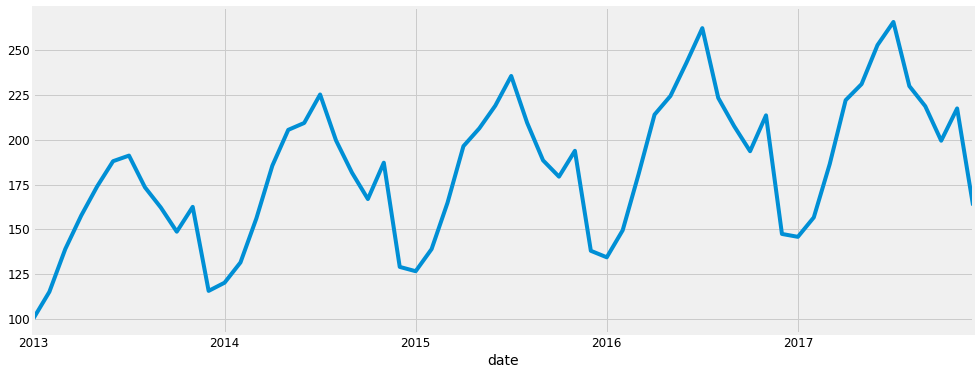

In [133]:
y.plot(figsize=(15, 6))
plt.show()

## 3.1.2 Time-series Decomposition

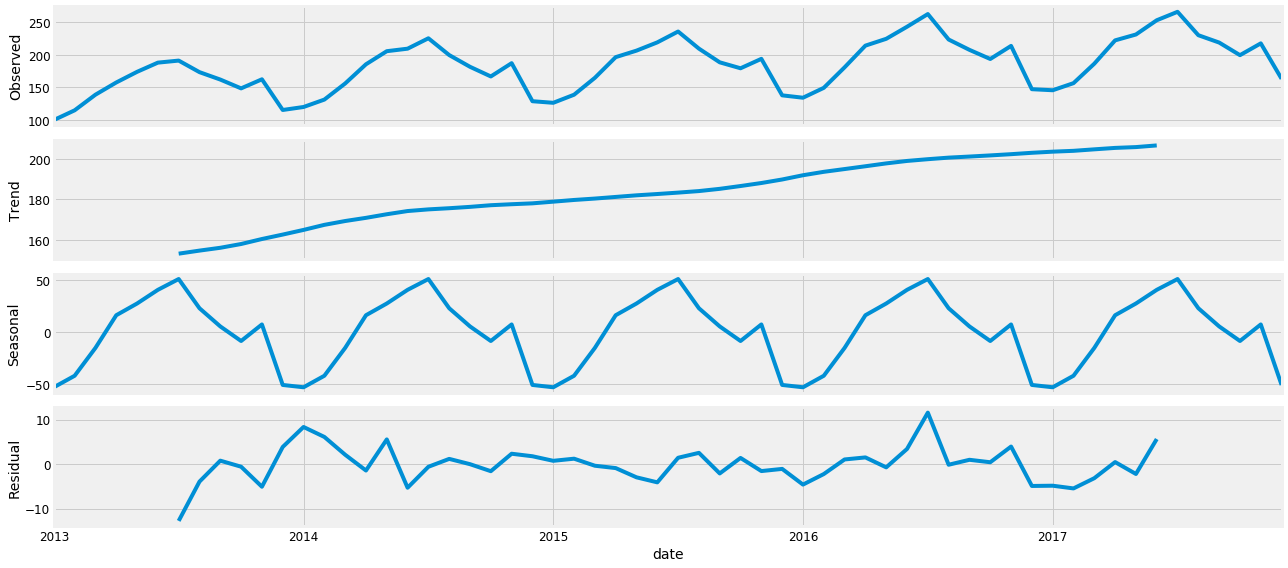

In [134]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## 3.1.3 Parameter Selection

In [135]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)


In [136]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                  continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:787.7596108304269
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:596.0012895713029
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:394.1917561320804


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1064.2272942720435
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:344.602660129393
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:320.5230722668764
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:263.90612478623274


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1242.3388411661122
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:710.9380378981643
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:534.4312330327241
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:352.2733144462977
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1395.1871624172022


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:348.063004694156
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:301.16646904537896
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:254.44208978878686
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1338.3689041303783
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:540.5782902525444
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:399.7373868665065
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:299.30682562269635
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1379.7568499919516
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:306.4572626975819
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:298.02022900551566
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:218.19855538812848
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1399.6828301110963
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:532.7040650813548
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:392.73621492175846
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:287.8257030311701
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:864.2166699771441
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:298.5670980164399
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:283.3592347816896
AR

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1406.4145887668528
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:301.9822683631107
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:297.4575210149442
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:219.56807505368965


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1347.8942329263464
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:543.7400018878118
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:403.93253377323055
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:294.07554813414043


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1321.055816846807
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:297.5357683892599
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:287.56506698027704
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:213.67341902363606


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1264.2408912133399
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:541.5544510595201
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:401.3172820341993
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:294.51386524707056
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:904.0401592863717
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:294.28080777589463
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:292.2706769124345
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:208.16297924426928


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1047.9573617160208
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:534.1338699409858
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:391.09405611053364
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:289.61674663706964


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1341.62100363866


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:296.88961074521586


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:290.1810491767841
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:208.45480485733287
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1361.018384211354


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [137]:
# item 1 ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC: 225.74
# item 2 ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:284.9667076467354
# item 3 ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:239.23462894199392
# item 4 ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:211.19508912357793
# item 5 ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:208.16297924426928

In [138]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1702      0.420     -0.406      0.685      -0.993       0.652
ma.L1         -0.3980      0.295     -1.349      0.177      -0.976       0.180
ar.S.L12      -0.1682      0.162     -1.037      0.300      -0.486       0.150
sigma2        21.2537      6.954      3.056      0.002       7.624      34.883


## 3.1.4 Validating the Model

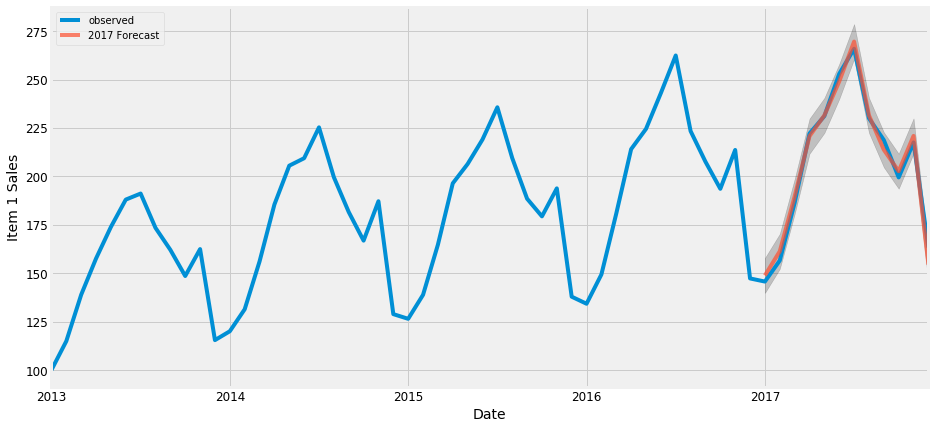

In [139]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='2017 Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Item 1 Sales')
plt.legend()
plt.show()

In [140]:
#predict 2017
print(pred_ci)

            lower TotalSales10  upper TotalSales10
date                                              
2017-01-01          139.862839          157.934386
2017-02-01          152.313281          170.384828
2017-03-01          180.597273          198.668821
2017-04-01          211.742516          229.814063
2017-05-01          222.461838          240.533386
2017-06-01          239.976392          258.047939
2017-07-01          260.551910          278.623457
2017-08-01          222.490757          240.562305
2017-09-01          204.731839          222.803387
2017-10-01          193.651201          211.722748
2017-11-01          211.874303          229.945851
2017-12-01          145.461604          163.533152


In [141]:
#pred_ci.to_csv('item1_2017_prediction.csv', index = True)

## 3.1.5 Evaluation

In [142]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 16.68


In [143]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4.08


In [144]:
rsquare_item1=r2_score(y_forecasted, y_truth)
rsquare_item1

0.9873656180928132

In [50]:
y_forecasted

date
2017-01-01    297.782509
2017-02-01    309.880603
2017-03-01    376.436021
2017-04-01    441.288798
2017-05-01    464.401894
2017-06-01    498.399186
2017-07-01    533.062474
2017-08-01    463.019578
2017-09-01    440.381278
2017-10-01    409.362333
2017-11-01    434.819231
2017-12-01    322.056787
Freq: MS, dtype: float64

In [51]:
y_truth

date
2017-01-01    279.096774
2017-02-01    311.178571
2017-03-01    372.225806
2017-04-01    437.000000
2017-05-01    465.967742
2017-06-01    492.966667
2017-07-01    533.903226
2017-08-01    468.645161
2017-09-01    432.266667
2017-10-01    399.419355
2017-11-01    441.666667
2017-12-01    318.548387
Freq: MS, Name: TotalSales10, dtype: float64

## 3.1.6 Making the Prediction

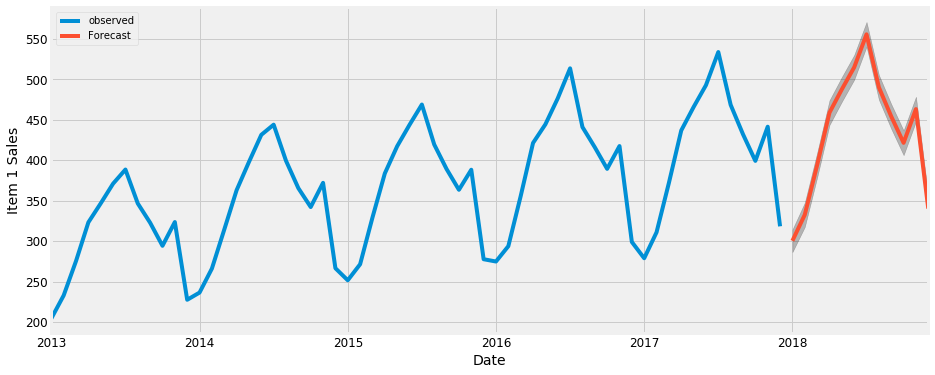

In [52]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Item 1 Sales')
plt.legend()
plt.show()

### Saving the Results

In [53]:
#predicted sales
prediction = pred_ci
print(prediction)

            lower TotalSales10  upper TotalSales10
2018-01-01          286.707572          314.666197
2018-02-01          317.827688          347.879228
2018-03-01          378.941576          409.357282
2018-04-01          443.789470          474.287582
2018-05-01          472.545470          503.067006
2018-06-01          499.749176          530.278410
2018-07-01          540.540620          571.072568
2018-08-01          475.002119          505.535051
2018-09-01          439.064844          469.598137
2018-10-01          406.455528          436.988954
2018-11-01          448.158766          478.692241
2018-12-01          325.218504          355.751997


In [54]:
#Mean of lower and upper prediction
prediction_mean = pred_uc.predicted_mean
print(prediction_mean)

2018-01-01    300.686884
2018-02-01    332.853458
2018-03-01    394.149429
2018-04-01    459.038526
2018-05-01    487.806238
2018-06-01    515.013793
2018-07-01    555.806594
2018-08-01    490.268585
2018-09-01    454.331491
2018-10-01    421.722241
2018-11-01    463.425503
2018-12-01    340.485251
Freq: MS, dtype: float64


In [55]:
#Actual sales results
train = y
print(train)

date
2013-01-01    204.677419
2013-02-01    233.178571
2013-03-01    275.677419
2013-04-01    323.466667
2013-05-01    346.935484
2013-06-01    371.266667
2013-07-01    388.709677
2013-08-01    346.806452
2013-09-01    322.966667
2013-10-01    294.483871
2013-11-01    323.833333
2013-12-01    227.774194
2014-01-01    236.677419
2014-02-01    266.321429
2014-03-01    314.451613
2014-04-01    363.166667
2014-05-01    398.064516
2014-06-01    431.600000
2014-07-01    444.161290
2014-08-01    399.548387
2014-09-01    365.700000
2014-10-01    342.387097
2014-11-01    372.300000
2014-12-01    266.774194
2015-01-01    251.870968
2015-02-01    271.678571
2015-03-01    329.419355
2015-04-01    383.900000
2015-05-01    417.516129
2015-06-01    443.966667
2015-07-01    469.032258
2015-08-01    419.645161
2015-09-01    389.333333
2015-10-01    363.677419
2015-11-01    388.466667
2015-12-01    277.903226
2016-01-01    275.064516
2016-02-01    294.034483
2016-03-01    355.870968
2016-04-01    421.53

In [56]:
pred_ci.to_csv('item1prediction_high_low_12mths.csv', index = True)

In [57]:
pred_uc.predicted_mean.to_csv('item1prediction_mean_12mths.csv', index = True)

In [180]:
y.to_csv('item1_monthlysales.csv', index = True)

Repeat for Items 2 to 5